In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# predata = pd.read_excel('data-20210220.xlsx', sheet_name='数字数据N=2088')
print(predata.shape)
predata.info()

(2097, 2531)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Columns: 2531 entries, NO to totalValueTTL
dtypes: float64(2087), int64(395), object(49)
memory usage: 40.5+ MB


In [341]:
## 选取变量
dat=predata[['NO','S1','S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S8','S11','F1',
      'H2','H4','H5','E1c1','E1c2','E1c3','E1c4','E1c5','E1c6','E1c7','E4','E6c1',
      'E6c2','E6c3','E6c4','E6c5','U1','U3','B1s1','B1s2','B1s3','B1s4','B1s5',
      'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
      'B1s16','B1s17','B1s18','B1s19','B1s20','frequencyMI','frequencyTTL','totalValueMI','totalValueTTL']]

## E1表示平台的数量
E1dat = dat[['E1c1','E1c2','E1c3','E1c4','E1c5','E1c6','E1c7']]
E1=[]
for index, row in E1dat.iterrows():
    E1.append(sum(row))

## E6表示设备的数量
E6dat = dat[['E6c1','E6c2','E6c3','E6c4','E6c5']]
E6=[]
for index, row in E6dat.iterrows():
    E6.append(sum(row))
    
dat = dat.drop(['E1c1','E1c2','E1c3','E1c4','E1c5','E1c6','E1c7'],axis=1)
dat = dat.drop(['E6c1','E6c2','E6c3','E6c4','E6c5'], axis=1)
dat['E1']=E1
dat['E6']=E6
dat.shape   #46个变量

(2097, 46)

In [ ]:
## 检查数据
## 查看有无空值
print(dat.isnull().any().any())
print(dat.isnull().sum())

# 将S8的空值替换成5,表明几乎不演奏
dat['S8'].fillna(5, inplace=True)
# 将F1的空值替换成2，默认为否，表明不会多种乐器
dat['F1'].fillna(2, inplace=True)

# # 再次查看有无空值
dat.isnull().any().any()

In [343]:
dat.shape

(2097, 46)

## 聚类

In [420]:
## 数据规范化处理
xdata = dat[['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S8','S11','F1',             
      'H2','H4','H5','E4','frequencyMI','frequencyTTL','totalValueMI','totalValueTTL']]  #'frequencyMI','frequencyTTL','totalValueMI',
#        'B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20',       
#对xdata进行标准化处理
s_raw = xdata.apply(lambda x:(x-x.mean())/x.std())
print(s_raw.shape)
s_raw.head()

(2097, 20)


,S2,S3t1,S4,B2,B3,B4,B5,S6,S7,S8,S11,F1,H2,H4,H5,E4,frequencyMI,frequencyTTL,totalValueMI,totalValueTTL
0,1.168846,0.581693,-2.168169,-1.043060,0.928230,0.702183,2.934577,-0.051696,1.403698,2.847030,-1.000754,1.007900,1.258038,0.835706,-0.177392,1.397350,0.138318,1.301807,1.501760,1.479985
1,1.168846,-0.051769,-0.872643,1.858543,-0.081888,-2.495381,-0.520289,-0.725024,1.403698,-0.914332,0.385363,1.007900,-1.318027,-0.671800,-0.177392,0.277227,-0.567406,-0.142885,0.192391,0.192176
2,1.168846,0.977608,-1.520406,1.858543,-2.102126,0.702183,3.625550,-0.725024,1.403698,-0.914332,-1.000754,-0.991689,-1.318027,-0.671800,1.954363,1.397350,-0.567406,-0.142885,-0.542132,-0.562112
3,1.168846,0.027414,-0.872643,-0.018965,-1.092007,-1.695990,-0.520289,-0.051696,-0.911145,0.026008,-1.000754,1.007900,-1.318027,0.081953,0.888485,0.277227,-0.567406,0.723931,-0.255349,-0.295965
4,-0.848495,-0.130952,0.422884,-0.872377,-0.081888,-0.097208,-0.520289,-0.051696,-0.448177,0.026008,0.385363,1.007900,0.184677,-1.425552,-1.243270,0.277227,0.138318,0.723931,0.042293,0.477334


In [421]:
# ## 计算Sdata的相关系数矩阵
# import warnings
# import seaborn as sns
# import matplotlib.pyplot as plt
# warnings.filterwarnings('ignore')
# plt.rcParams['figure.figsize'] = (25, 10)

# # 相关度热力图
# sns.heatmap(s_raw.corr(), cmap='GnBu_r', square=True, annot=True)

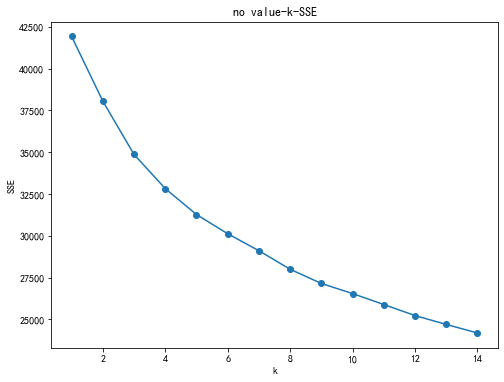

In [422]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
 
SSE = []  # 存放每次结果的误差平方和
for k in range(1,15):
    estimator = KMeans(n_clusters=k,random_state=666)  # 构造聚类器
    estimator.fit(s_raw)
    SSE.append(estimator.inertia_)
X = range(1,15)
plt.figure(figsize=(8,6))
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('no value-k-SSE') 
plt.plot(X,SSE,'o-')
plt.savefig('SSE(no value).png')
plt.show()

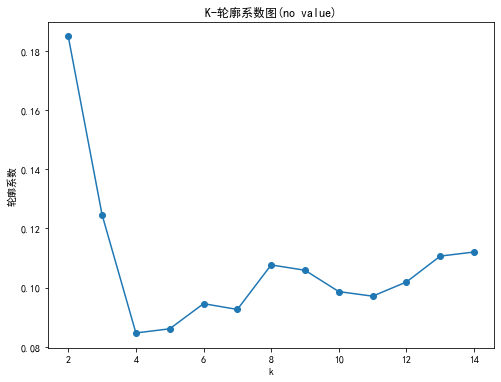

In [423]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

Scores = []  # 存放轮廓系数
for k in range(2,15):
    estimator = KMeans(n_clusters=k,random_state=666)  # 构造聚类器 666
    estimator.fit(s_raw)
    Scores.append(silhouette_score(s_raw,estimator.labels_,metric='euclidean'))
X = range(2,15)
plt.figure(figsize=(8,6))
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.title('K-轮廓系数图(no value)') 
plt.plot(X,Scores,'o-')
plt.savefig('no value-轮廓系数.png')
plt.show()

## k==8 分成8类

In [424]:
import pandas as pd
#参数初始化
k = 8 #聚类的类别
iteration = 10 #聚类最大循环次数

from sklearn.cluster import KMeans
model = KMeans(n_clusters = k, max_iter = iteration, random_state=666) #分为k类
#model = KMeans(n_clusters = k, n_jobs = 4, max_iter = iteration) #分为k类，并发数4
model.fit(s_raw) #开始聚类

#简单打印结果
r1 = pd.Series(model.labels_).value_counts() #统计各个类别的数目
r2 = pd.DataFrame(model.cluster_centers_) #找出聚类中心
r = pd.concat([r2, r1], axis = 1) #横向连接（0是纵向），得到聚类中心对应的类别下的数目
print(r)
r.columns = list(s_raw.columns) + [u'类别数目'] #重命名表头
print(r)

#详细输出原始数据及其类别
r = pd.concat([xdata, pd.Series(model.labels_, index =xdata.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(xdata.columns) + [u'聚类类别'] #重命名表头
# r.to_excel(outputfile) #保存结果
print(r)

         0         1         2         3         4         5         6   \
0 -0.009652  0.719859  0.588130 -0.615483  0.273714 -0.231799 -0.444494   
1 -0.009282 -0.575326 -0.357023  0.109389 -0.102091 -1.446580  0.322698   
2  0.238266  0.189866 -0.243685  0.538782 -0.140541  0.454630 -0.197092   
3 -0.629036 -0.276728  0.416108 -0.213928  0.368227  0.628599 -0.297675   
4  0.281638 -0.860180 -1.283006  0.318826 -1.499228 -0.532478  1.328335   
5  0.543382  0.602094 -0.289938  0.777802 -0.298027  0.286779  0.034903   
6  0.298204 -0.173877  0.167188 -0.559759  0.630511  0.087914  0.243418   
7 -0.034481 -0.096223  0.263784  0.289462  0.361146  0.533890 -0.192986   

         7         8         9   ...        11        12        13        14  \
0  1.273491  0.079749  0.527364  ... -0.568307  0.051055 -0.152633 -0.006090   
1 -0.203868 -0.435213 -0.383980  ...  0.727957 -0.017114  0.175418 -0.126230   
2 -0.473069  0.966118 -0.562463  ... -0.694976  0.082881  0.188937  0.173316   
3 -0

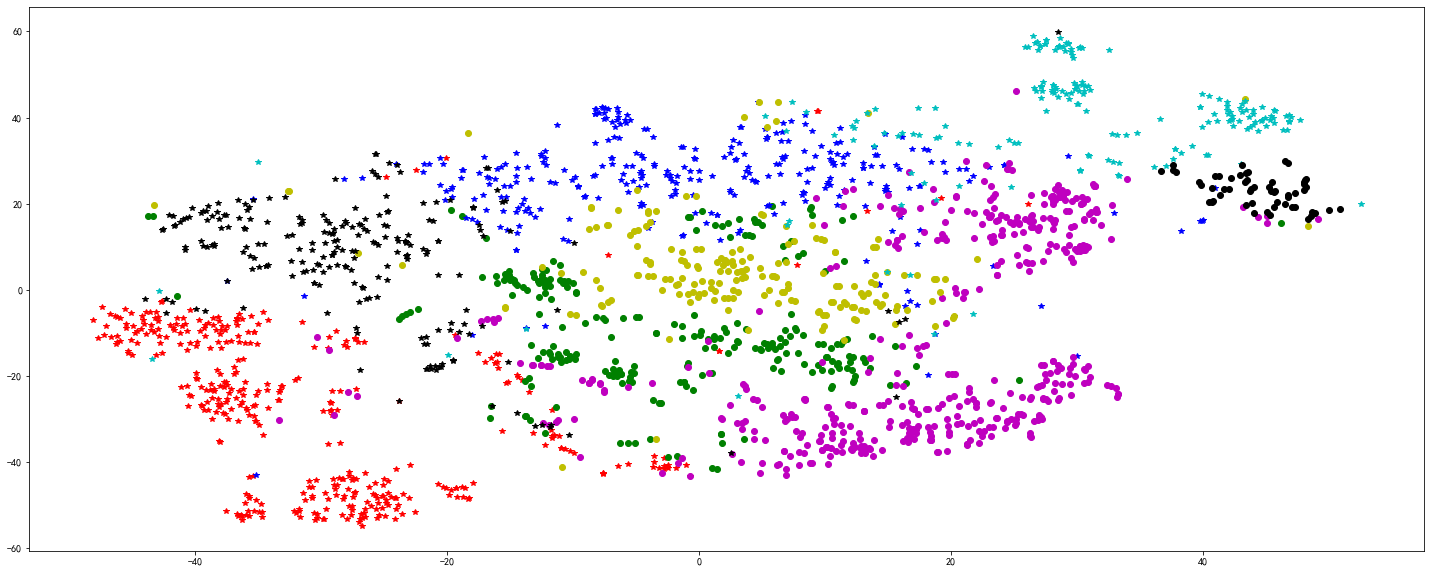

In [425]:
#用TSNE进行数据降维并展示聚类结果
from sklearn.manifold import TSNE
tsne = TSNE()
tsne.fit_transform(s_raw) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = s_raw.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r*')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
d = tsne[r[u'聚类类别'] == 3]
plt.plot(d[0], d[1], 'mo')
d = tsne[r[u'聚类类别'] == 4]
plt.plot(d[0], d[1], 'yo')
d = tsne[r[u'聚类类别'] == 5]
plt.plot(d[0], d[1], 'k*')
d = tsne[r[u'聚类类别'] == 6]
plt.plot(d[0], d[1], 'c*')
d = tsne[r[u'聚类类别'] == 7]
plt.plot(d[0], d[1], 'ko')
d = tsne[r[u'聚类类别'] == 8]
plt.plot(d[0], d[1], 'm*')

plt.savefig('kmeans-8(no value).png')
plt.show()

In [380]:
## 聚类结果分析
# 将聚类结果带入原始数据
dat["label"]=r['聚类类别']
result_avg=dat.groupby("label").mean()
result_avg=result_avg.join(dat.label.value_counts())
result_avg["rate"]=result_avg["label"]/sum(result_avg["label"])
print(result_avg[['label','rate']])
dat.to_csv("dat-8(no value).csv")

       label      rate
label                 
0        393  0.187411
1        248  0.118264
2        312  0.148784
3        479  0.228422
4        191  0.091082
5        227  0.108250
6        190  0.090606
7         57  0.027182


### 决策树

In [395]:
X = xdata
Y = dat['label']
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2)
print(X.shape)
print(Y.shape)
print(Xtrain.shape)
print(Xtest.shape)

(2097, 20)
(2097,)
(1677, 20)
(420, 20)


In [415]:
clf = DecisionTreeClassifier(random_state=555, splitter="random", class_weight='balanced') # 初始化
clf = clf.fit(Xtrain,Ytrain) # 拟合

# 分类准确率
score_ = clf.score(Xtest, Ytest) # 验证集查看得分
print(score_)

# 可以输入数据送到训练好的模型里，输出预测的类
y_pred = clf.predict(Xtest)
print(y_pred[:10])

#看特征变量的使用情况
# [*zip(feature_name,clf.feature_importances_)]

0.8166666666666667
[3 3 3 0 0 1 5 3 2 5]


In [413]:
#生成决策树
from sklearn.tree import DecisionTreeClassifier
#设置最大叶子数为8
dtModel = DecisionTreeClassifier(random_state=555,class_weight='balanced', max_leaf_nodes=12) 

#模型检验－交叉验证法
from sklearn.model_selection import cross_val_score
print(cross_val_score(dtModel,X,Y,cv=10).mean())

#训练模型
dtModel=dtModel.fit(X, Y) 

0.7883230804283435


In [414]:
# tree模型可视化
import re
import pydotplus
from six import StringIO  #生成StringIO对象
from sklearn.tree import export_graphviz
# dot_data = StringIO() #把文件暂时写在内存的对象中
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

dot_data = export_graphviz(
    dtModel,
    out_file=None,
    class_names=['0','1','2','3','4','5','6','7'],
#     feature_names=['性别', '年龄', '家庭年收入', '职业', '教育水平', '种族', '宗教信仰', '上次为谁购买', '第一次演奏乐器时间', '使用乐器频率', '哪一年购买乐器',
#        '是否可以演奏多种乐器', '上次在哪里购买', '购物思考时间', '购物方式', '音乐APP', '质量','定制化','新潮','简约','传统','归属感','刺激','自然',
#         '服务','自由自在','激情','高尚','科技','活力','进取','明智购物','个人效率','古典','安逸','全面成本', '乐器的总购买数量','乐器+配件的总购买数量',
#                    '乐器的总购买金额','乐器配件总购买金额'],
    
    feature_names=['性别', '年龄', '家庭年收入', '职业', '教育水平', '种族', '宗教信仰', '上次为谁购买', '第一次演奏乐器时间', '使用乐器频率', '哪一年购买乐器',
       '是否可以演奏多种乐器', '上次在哪里购买', '购物思考时间', '购物方式', '音乐APP','乐器的总购买数量','乐器+配件的总购买数量','乐器的总购买金额','乐器配件总购买金额'],
#     feature_names=['S2','S3t1','S4','B2','B3','B4','B5','S6','S7','S8','S11','F1',
#       'H2','H4','H5','E1','E4','E6','U1','U3','B1s1','B1s2','B1s3','B1s4','B1s5',
#       'B1s6','B1s7','B1s8','B1s9','B1s10','B1s11','B1s12','B1s13','B1s14','B1s15',
#       'B1s16','B1s17','B1s18','B1s19','B1s20','totalValueTTL'],
    filled=True,rounded=True,special_characters=True
)

with open("dot_data.dot", 'w+', encoding="utf-8-sig") as f:  # 注意编码方式
    f.writelines(dot_data)
    
# 打开 dot_data.dot，修改 fontname="支持的中文字体"
f = open("dot_data.dot",  encoding="utf-8-sig")
open('dot_test.dot', 'w+', encoding="utf-8-sig").write(re.sub(r'fontname=helvetica', 'fontname="Microsoft YaHei"', f.read()))

with open("dot_test.dot",  encoding="utf-8-sig") as fp:
    dot_test = fp.read()
    
graph = pydotplus.graph_from_dot_data(dot_test)  #.getvalue()
graph.write_pdf('tree_8(no value)_23.pdf')

True